In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from collections import Counter
import copy
import tqdm
from sklearn.metrics import confusion_matrix

In [2]:
iris = pd.read_csv('../Data/iris.data', header=None, skipinitialspace=True,
    names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
    )
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Begin by implementing the k-Nearest Neighbors (kNN) classification algorithm

(a) Use a Python class with internal parameter k and methods train and predict. <br>
i. The train method should take in an array of pre-labeled data and store them to be used in
the kNN calculation later. <br>
ii. The predict method should take in a single data point (of the same dimension as those used
in training) and return the label of the kNN decision. Keep in mind that, in general, you
may have to choose between multiple labels. In this case, ties are possible, but you can just
decide to break them randomly or increase k to get more votes.<br>
(b) Test the algorithm on some simple hand-made data that you can easily visualize or inspect to
check for correct behavior.

In [3]:
# Class with internal parameter k and methods train and predict
class KNN:
    def __init__(self, k):
        self.k = k
        
    # i.The train method should take in an array of pre-labeled data and store them to be used in the kNN calculation later.
    # training the algorithm based on already found data
    def train(self, data, labels):
        self.data = data
        self.labels = labels
        
    # ii. The predict method should take in a single data point (of the same dimension as those used in training) 
    # and return the label of the kNN decision. Keep in mind that, in general, you may have to choose between multiple labels. 
    # In this case, ties are possible, but you can just decide to break them randomly or increase k to get more votes
    # send in a test point for it to be classified
    def predict(self, x):
        # need to find k closest neighbors to the point w the Euclidean norm
        # pair up each distance with the label of its point
        distances = [ (norm(x - self.data[i]), self.labels[i]) for i in range(len(self.data))]
        #print('Distances: ', distances)
        
        # order all the distances
        k_nearest = sorted(distances)
        #print('k_nearest: ', distances)
        
        # determine the labels of the top k points & do majority vote
        return max(Counter([p[1] for p in k_nearest[:k]]))
    

In [4]:
def norm(x):
    return np.sqrt(np.sum(x**2))

(2b) Test the algorithm on some simple hand-made data that you can easily visualize or inspect to
check for correct behavior.

In [5]:
k = 3
knn = KNN(k) 

data = np.array([
    [4,2],
    [5,3],
    [-1,3],
    [2,4],
    [5,-2],
    [-5,1],
    [1,-1],
    [4,-3]
])
labels = np.random.choice(a=['Red', 'Black'], size=len(data))

unknown = [2, 1]

knn.train(data, labels)
knn.predict(unknown)

'Red'

## 3. Write a python routines to split a given data set (randomly) into testing and training subsets. 
It’s a good idea to parameterize this process with a percentage p so the data is split into sets of size np and
n(1 − p); then you can “tune” p later for your specific training/testing procedure.

In [6]:
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]

    return (list1, list2)

In [7]:
temp = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10] )
print(temp)
print(divideSets(.2, temp))

[ 1  2  3  4  5  6  7  8  9 10]
(array([3, 9]), array([ 5,  2, 10,  8,  4,  7,  6,  1]))


## 4. Using Python, implement the k-means algorithm and test this on the Iris dataset. 
Try using all of the columns versus only a subset. What works the best? How well does the algorithm do when setting
k = 3, the true number of classes? Show the results visually (using only 2-d scatter plots) – be sure to
indicate visually both the predicted cluster result and the true iris class.


In [8]:
k = 3
knn = KNN(k)

x = iris[['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width']].values
labels = iris['Class'].values

knn.train(x, labels)

unclassified = [8, 1.2, 3, 5.1]
print(f'The unclassified point {unclassified} has been classified as:', knn.predict(unclassified))

The unclassified point [8, 1.2, 3, 5.1] has been classified as: Iris-virginica


Text(0.5, 1.0, 'Sepal Length vs Width & Petal Length vs Width')

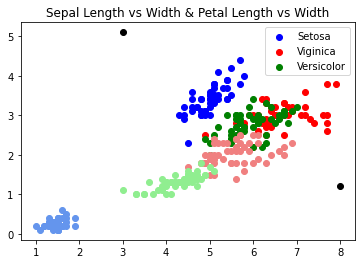

In [9]:
setosa = iris[iris['Class'] == 'Iris-setosa']
virginica = iris[iris['Class'] == 'Iris-virginica']
versicolor = iris[iris['Class'] == 'Iris-versicolor']

# SEPAL LENGTH VS WIDTH
plt.scatter(x=setosa['Sepal Length'], y=setosa['Sepal Width'], color='b')
plt.scatter(x=virginica['Sepal Length'], y=virginica['Sepal Width'], color='r')
plt.scatter(x=versicolor['Sepal Length'], y=versicolor['Sepal Width'], color='g')

# PETAL LENGTH VS WIDTH
plt.scatter(x=setosa['Petal Length'], y=setosa['Petal Width'], color='cornflowerblue')
plt.scatter(x=virginica['Petal Length'], y=virginica['Petal Width'], color='lightcoral')
plt.scatter(x=versicolor['Petal Length'], y=versicolor['Petal Width'], color='lightgreen')

plt.scatter(x=unclassified[0], y=unclassified[1], color='black') 
plt.scatter(x=unclassified[2], y=unclassified[3], color='black') 

plt.legend(['Setosa', 'Viginica', 'Versicolor'])
plt.title("Sepal Length vs Width & Petal Length vs Width")

In [10]:
k = 3
knn = KNN(k)

x = iris[['Sepal Length','Sepal Width']].values
labels = iris['Class'].values

knn.train(x, labels)

unclassified = [3, 6]
print(f'The unclassified point {unclassified} has been classified as:', knn.predict(unclassified))

The unclassified point [3, 6] has been classified as: Iris-setosa


Text(0.5, 1.0, 'Sepal Length vs Width & Petal Length vs Width')

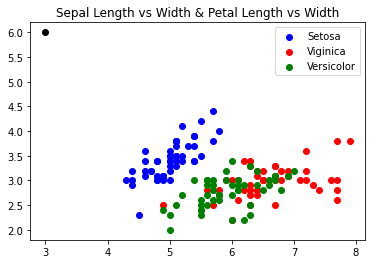

In [11]:
plt.scatter(x=setosa['Sepal Length'], y=setosa['Sepal Width'], color='b')
plt.scatter(x=virginica['Sepal Length'], y=virginica['Sepal Width'], color='r')
plt.scatter(x=versicolor['Sepal Length'], y=versicolor['Sepal Width'], color='g')

plt.scatter(x=unclassified[0], y=unclassified[1], color='black') 
plt.legend(['Setosa', 'Viginica', 'Versicolor'])
plt.title("Sepal Length vs Width & Petal Length vs Width")

## 5. Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to. 
(a) Show some confusion matrices for different size testing versus training datasets. <br>
(b) How does the accuracy change for different size training sets? Show how the accuracy changes
within the training set and testing set separately. <br>
(c) What if you repeat this process, keeping the training fraction p the same? Does the accuracy
change drastically based on the “quality” of the testing set? How might you quantify this behavior? <br>

In [12]:
sepal_lengths = [ (iris['Sepal Length'][i], iris['Class'][i]) for i in range(len(iris['Sepal Length']))]

p = 0.6
n = len(iris['Sepal Length'])
rets = divideSets(p, sepal_lengths)
list1 = rets[0] 
list2 = rets[1] 

data1 = [t[0] for t in list1]
print('\nData (List1):\n', data1)
labels1 = [t[1] for t in list1]
print('\nLabels (List1):\n', labels1)

data2 = [t[0] for t in list2]
print('\nData (List2):\n', data2)
labels2 = [t[1] for t in list2]
print('\nLabels (List2):\n', labels2)


Data (List1):
 [5.4, 5.5, 5.8, 6.5, 5.5, 5.4, 4.4, 7.7, 6.6, 6.7, 6.5, 6.1, 6.4, 6.3, 4.7, 6.3, 5.3, 4.9, 6.0, 5.1, 6.0, 6.3, 6.4, 6.7, 6.9, 6.4, 6.5, 5.5, 5.2, 4.9, 5.6, 5.7, 5.8, 5.0, 6.3, 7.2, 4.6, 5.8, 6.3, 6.3, 5.1, 4.4, 5.5, 5.6, 5.1, 5.6, 5.0, 5.6, 5.1, 5.4, 5.6, 7.2, 4.8, 5.2, 5.7, 6.4, 6.5, 4.9, 7.7, 6.1, 6.9, 6.2, 5.1, 6.6, 5.8, 5.0, 4.8, 6.0, 5.9, 6.3, 6.1, 5.0, 7.1, 6.1, 6.8, 6.2, 5.4, 5.7, 5.4, 5.1, 6.8, 6.0, 5.7, 4.5, 6.3, 6.1, 7.6, 4.6, 4.3, 4.9]

Labels (List1):
 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iri

In [13]:
k = 3
knn = KNN(k)

knn.train(data1, labels1)

predictions_labels = []
for x in data2:
    predictions_labels.append(knn.predict(x))
    
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
print(predictions)

[(4.6, 'Iris-setosa'), (4.7, 'Iris-setosa'), (6.4, 'Iris-virginica'), (7.7, 'Iris-virginica'), (5.4, 'Iris-setosa'), (4.8, 'Iris-setosa'), (5.7, 'Iris-versicolor'), (6.7, 'Iris-virginica'), (4.9, 'Iris-setosa'), (7.0, 'Iris-virginica'), (6.2, 'Iris-versicolor'), (6.0, 'Iris-virginica'), (4.4, 'Iris-setosa'), (5.0, 'Iris-setosa'), (6.8, 'Iris-virginica'), (6.7, 'Iris-virginica'), (5.1, 'Iris-setosa'), (6.4, 'Iris-virginica'), (6.1, 'Iris-versicolor'), (6.5, 'Iris-virginica'), (5.2, 'Iris-versicolor'), (5.2, 'Iris-versicolor'), (5.8, 'Iris-virginica'), (7.7, 'Iris-virginica'), (6.0, 'Iris-virginica'), (7.4, 'Iris-virginica'), (5.9, 'Iris-versicolor'), (6.7, 'Iris-virginica'), (5.1, 'Iris-setosa'), (4.9, 'Iris-setosa'), (5.0, 'Iris-setosa'), (6.9, 'Iris-virginica'), (6.4, 'Iris-virginica'), (6.2, 'Iris-versicolor'), (5.5, 'Iris-versicolor'), (5.5, 'Iris-versicolor'), (5.5, 'Iris-versicolor'), (6.3, 'Iris-versicolor'), (5.7, 'Iris-versicolor'), (5.1, 'Iris-setosa'), (7.2, 'Iris-virginica')

(a) Show some confusion matrices for different size testing versus training datasets.

In [14]:
print('True Labels:\n', labels2)
print('\nPredicted Labels:\n', predictions_labels)

print('\nConfusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

True Labels:
 ['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-vers

(b) How does the accuracy change for different size training sets? Show how the accuracy changes
within the training set and testing set separately.

In [15]:
sepal_lengths = [ (iris['Sepal Length'][i], iris['Class'][i]) for i in range(len(iris['Sepal Length']))]

p = 0.1
n = len(iris['Sepal Length'])
for x in range(9):
    rets = divideSets(p, sepal_lengths)
    list1 = rets[0] 
    list2 = rets[1] 

    data1 = [t[0] for t in list1]
    labels1 = [t[1] for t in list1]
    data2 = [t[0] for t in list2]
    labels2 = [t[1] for t in list2]

    k = 3
    knn = KNN(k)
    knn.train(data1, labels1)
    predictions_labels = []
    for x in data2:
        predictions_labels.append(knn.predict(x))

    predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
    print(f'\np = {p:1.1}')
    print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))
    p += 0.1


p = 0.1
Confusion Matrix: 
 [[35  9  0]
 [ 5 36  2]
 [ 1 34 13]]

p = 0.2
Confusion Matrix: 
 [[17 14 12]
 [ 4  5 32]
 [ 0  0 36]]

p = 0.3
Confusion Matrix: 
 [[20  9  2]
 [ 4  8 27]
 [ 0  1 34]]

p = 0.4
Confusion Matrix: 
 [[21  9  1]
 [ 2  7 18]
 [ 0  4 28]]

p = 0.5
Confusion Matrix: 
 [[16  8  0]
 [ 4  8 12]
 [ 1  5 21]]

p = 0.6
Confusion Matrix: 
 [[15  3  1]
 [ 2 10 13]
 [ 1  3 12]]

p = 0.7
Confusion Matrix: 
 [[16  4  0]
 [ 1  5  4]
 [ 0  5 10]]

p = 0.8
Confusion Matrix: 
 [[6 4 0]
 [1 0 6]
 [0 7 7]]

p = 0.9
Confusion Matrix: 
 [[4 1 0]
 [0 2 2]
 [0 3 3]]


(c) What if you repeat this process, keeping the training fraction p the same? Does the accuracy
change drastically based on the “quality” of the testing set? How might you quantify this behavior?

In [16]:
p = 0.6
n = len(iris['Sepal Length'])
for x in range(5):
    rets = divideSets(p, sepal_lengths)
    list1 = rets[0] 
    list2 = rets[1] 

    
    data1 = [t[0] for t in list1]
    labels1 = [t[1] for t in list1]
    data2 = [t[0] for t in list2]
    labels2 = [t[1] for t in list2]

    k = 3
    knn = KNN(k)
    knn.train(data1, labels1)
    predictions_labels = []
    for x in data2:
        predictions_labels.append(knn.predict(x))

    
    predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
   
    print(f'\np = {p:1.1}')
    print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))


p = 0.6
Confusion Matrix: 
 [[17  2  0]
 [ 3  8  6]
 [ 1  5 18]]

p = 0.6
Confusion Matrix: 
 [[15  2  2]
 [ 0  6 15]
 [ 0  6 14]]

p = 0.6
Confusion Matrix: 
 [[10  5  1]
 [ 2  3 16]
 [ 0  6 17]]

p = 0.6
Confusion Matrix: 
 [[ 9  4  0]
 [ 3 14  5]
 [ 0 10 15]]

p = 0.6
Confusion Matrix: 
 [[14  5  1]
 [ 3  2 12]
 [ 0  8 15]]


## 6. Try using the adult dataset to also do some prediction of income level (more or less than $50k). 
(a) How can you try to quantify the “distance” between two adults? Write some small python
functions to try and transform this data into something that can be used by the kNN classifier.
Try a couple different approaches, report their different behaviors and illustrate using learning
curves, confusion matrices, and possibly some statistical measurements. <br>
(b) Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?

In [17]:
adults = pd.read_csv('../Data/adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
    )
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
education_income = [ (adults['education-num'][i], adults['income'][i]) for i in range(1000)]

p = 0.6
n = len(adults['education-num'])
rets = divideSets(p, education_income)
list1 = rets[0] 
list2 = rets[1] 


data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]

data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]

k = 3
knn = KNN(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
print(f'\np = {p:1.1}')
print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

100%|██████████| 400/400 [00:02<00:00, 191.27it/s]


p = 0.6
Confusion Matrix: 
 [[312   2]
 [ 78   8]]


(a) How can you try to quantify the “distance” between two adults? Write some small python
functions to try and transform this data into something that can be used by the kNN classifier.
Try a couple different approaches, report their different behaviors and illustrate using learning
curves, confusion matrices, and possibly some statistical measurements.


In [19]:
# scale the occupations based one which are more likely to earn >50k

num_occupations = len(adults['occupation'].unique())

probabilities = [] 
for i in adults['occupation'].unique():
    current = adults[ (adults['occupation'] == i) & (adults['income'] == '>50K') ]
    pAnB = len(current) / len(adults)
    B = adults[ (adults['occupation'] == i) ]
    pB = len(B) / len(adults)
    pAgivenB = pAnB / pB
    probabilities.append((pAgivenB, i))
    
probabilities_sorted = sorted(probabilities)

ranks = []
count = 0
for p in probabilities_sorted:
    ranks.append((p[1], count))
    count += 1

print('Occupations and their ranks based on their probability to have an income >50k:\n')
print(ranks)

Occupations and their ranks based on their probability to have an income >50k:

[('Priv-house-serv', 0), ('Other-service', 1), ('Handlers-cleaners', 2), ('?', 3), ('Armed-Forces', 4), ('Farming-fishing', 5), ('Machine-op-inspct', 6), ('Adm-clerical', 7), ('Transport-moving', 8), ('Craft-repair', 9), ('Sales', 10), ('Tech-support', 11), ('Protective-serv', 12), ('Prof-specialty', 13), ('Exec-managerial', 14)]


In [20]:
# REPLACE OCCUPATION WITH RANK
occupations = adults['occupation']
for job in ranks:
    occupations = occupations.replace(job[0], job[1])

In [21]:
adults = adults.assign(occupation_num = occupations)
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,14
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,13


In [22]:
occupation_income = [ (adults['occupation_num'][i], adults['income'][i]) for i in range(10000)]

p = 0.6
n = len(occupation_income)
rets = divideSets(p, occupation_income)
list1 = rets[0] 
list2 = rets[1] 

data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]

data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]

k = 3
knn = KNN(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
print(f'\np = {p:1.1}')
print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

100%|██████████| 4000/4000 [03:53<00:00, 17.12it/s]


p = 0.6
Confusion Matrix: 
 [[3066    0]
 [ 934    0]]


(b) Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?

In [23]:
# HOURS-PER-WEEK PREDICTING INCOME
hours = [(adults['hours-per-week'][i], adults['income'][i]) for i in range(1000)]


p = 0.6
n = len(adults['hours-per-week'])
rets = divideSets(p, hours)
list1 = rets[0] 
list2 = rets[1] 

data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]


data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]

k = 3
knn = KNN(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
print(f'\np = {p:1.1}')
print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

100%|██████████| 400/400 [00:02<00:00, 178.10it/s]


p = 0.6
Confusion Matrix: 
 [[299  10]
 [ 89   2]]
